支持向量機（SVM）是一個功能強大且全面的機器學習模型，能夠執行**線性或非線性分類，迴歸，甚至異常值檢測**。**SVM 特别適用於中小型複雜數據集的分類**。

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Linear SVM Classification

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]            # petal length, petal width
y = iris['target']

In [4]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [5]:
X[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [6]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# SVM Classifier model
svm_clf = SVC(kernel = 'linear', C = float('inf'))

In [8]:
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [10]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = '#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth = 2)
    plt.plot(x0, gutter_up, 'k--', linewidth = 2)
    plt.plot(x0, gutter_down, 'k--', linewidth = 2)

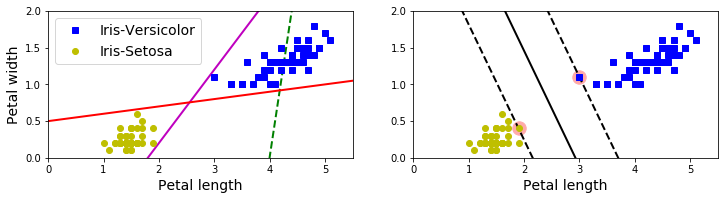

In [11]:
plt.figure(figsize = (12, 2.7))

plt.subplot(121)
plt.plot(x0, pred_1, 'g--', linewidth = 2)
plt.plot(x0, pred_2, 'm-', linewidth = 2)
plt.plot(x0, pred_3, 'r-', linewidth = 2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Iris-Versicolor')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label ='Iris-Setosa')
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo')
plt.xlabel('Petal length', fontsize = 14)
plt.axis([0, 5.5, 0, 2])

plt.show()

上圖顯示了鳶尾花數據集的一部份。兩個類別可以很容易地用一條直線（它們是**線性可分**的）分開。
* 左圖顯示了三種可能的線性分類器的**決策邊界**。
* 其中虛線所代表的模型表現很糟，甚至無法正確實現分類。
* 另外兩個模型在這個訓練集上表現完美，但它們的決策邊界與實例非常接近，導致在面對新實例時，表現可能不會太好。
* 相比之下，右圖中的**實線代表 SVM 分類器決策邊界**，這條線不僅將兩個類別分開，而且**盡可能遠離了最近的訓練實例**。

可以將 SVM 分類器視為在類別之間擬合可能最寬的**間隔**（由平行虛線表示）。這也稱為**大間隔分類（large margin classification）**。

在間隔之外添加更多訓練實例不會對決策邊界產生影響：它**完全由位於間隔邊緣的實例所決定（或稱之為“支持”(supported)）**。 這些實例稱為**支持向量（support vectors）**（在上右圖中被圈出來的點）。

In [12]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

In [13]:
svm_clf = SVC(kernel = 'linear', C = 100)

In [14]:
svm_clf.fit(Xs, ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(Xs)

In [18]:
svm_clf_scale = SVC(kernel = 'linear', C = 100)

In [19]:
svm_clf_scale.fit(X_scaled, ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

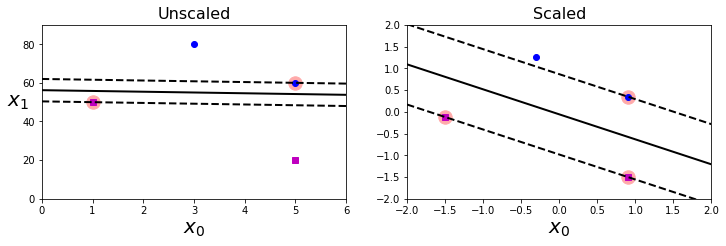

In [20]:
plt.figure(figsize = (12, 3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], 'bo')
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize = 20)
plt.ylabel('$x_1$', fontsize = 20, rotation = 0)
plt.title('Unscaled', fontsize = 16)
plt.axis([0, 6, 0, 90])

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], 'bo')
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_clf_scale, -2, 2)
plt.xlabel('$x_0$', fontsize = 20)
plt.title('Scaled', fontsize = 16)
plt.axis([-2, 2, -2, 2])

plt.show()

SVM 對特徵的縮放很敏感，如上圖所示：在左圖中，垂直刻度比水平刻度大得多，因此可能的最寬間隔接近於水平。在特徵縮放（例如，使用 Scikit-Learn 的 StandardScaler）後，決策邊界看起來好很多（可參考右圖）。

## Soft Margin Classification

如果嚴格強制讓所有實例都不在間格上，並且位於正確的一邊，這稱為**硬間隔分類（hard margin classification）**。

硬間隔分類有兩個主要問題：

* 它只有在數據是**線性可分**的情況下才有效
* 它對**異常值非常敏感**

In [21]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

In [22]:
Xo1 = np.concatenate([X, X_outliers[:1]], axis = 0)
Xo1[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [23]:
yo1 = np.concatenate([y, y_outliers[:1]], axis = 0)
yo1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [24]:
Xo2 = np.concatenate([X, X_outliers[1:]], axis = 0)
yo2 = np.concatenate([y, y_outliers[1:]], axis = 0)

In [25]:
Xo2[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [26]:
yo2[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
svm_clf2 = SVC(kernel = 'linear', C = 10 ** 9)

In [28]:
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

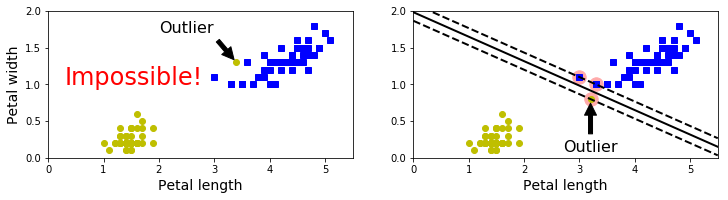

In [29]:
plt.figure(figsize = (12, 2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], 'bs')
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(0.3, 1.0, 'Impossible!', fontsize = 24, color = 'red')
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.annotate('Outlier',
             xy = (X_outliers[0][0], X_outliers[0][1]),
             xytext = (2.5, 1.7),
             ha = 'center',
             arrowprops = dict(facecolor = 'black', shrink = 0.1),
             fontsize = 16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], 'bs')
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], 'yo')
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel('Petal length', fontsize = 14)
plt.annotate('Outlier',
             xy = (X_outliers[1][0], X_outliers[1][1]),
             xytext = (3.2, 0.08),
             ha = 'center',
             arrowprops = dict(facecolor = 'black', shrink = 0.1),
             fontsize = 16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

上圖顯示了有一個額外異常值的鳶尾花數據集：在左圖的數據根本找不出硬間隔，而右圖顯示的決策邊界與之前的圖中所看到的沒有異常值時的決策邊界也不同，無法很好地泛化。

為了避免上述問題，目標是在保持間隔寬闊和限制*間隔違例（margin violations）*（即實例在間隔之上，甚至在錯誤一邊的情況）之間找到良好的**平衡**。 這稱為**軟間隔分類（soft margin classification）**。

In [30]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [31]:
iris=datasets.load_iris()
X = iris["data"][:,(2,3)]            # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)      # Iris-Viginica

In [32]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C = 1, loss= 'hinge', random_state = 42)
svm_clf2 = LinearSVC(C = 100, loss = 'hinge', random_state = 42)

In [33]:
scaled_svm_clf1 = Pipeline([
        ('scaler', scaler),
        ('linear_svc', svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ('scaler', scaler),
        ('linear_svc', svm_clf2),
    ])

In [34]:
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

Convert to unscaled parameters

In [35]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

In [36]:
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

In [37]:
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])

In [38]:
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

Find support vectors (LinearSVC does not do this automatically)

In [39]:
t = y * 2 - 1

In [40]:
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()

In [41]:
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

繪製圖形

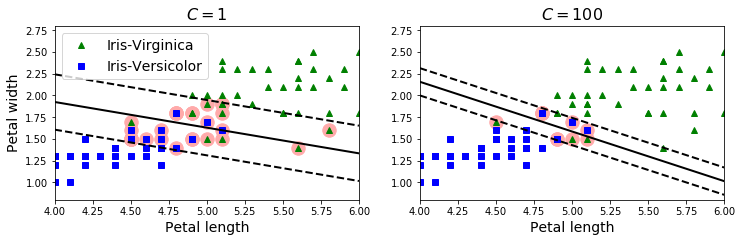

In [42]:
plt.figure(figsize = (12, 3.2))
plt.subplot(121)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^', label = 'Iris-Virginica')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs', label = 'Iris-Versicolor')
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('$C = {}$'.format(svm_clf1.C), fontsize = 16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel('Petal length', fontsize = 14)
plt.title('$C = {}$'.format(svm_clf2.C), fontsize = 16)
plt.axis([4, 6, 0.8, 2.8])

plt.show()

在 Scikit-Learn 的 SVM 中，可以使用**超參數 C** 控制此平衡：**C 值越小，則會有更寬的間隔，但間隔違例也會越多**。

上圖顯示了在一個**非線性可分離數據集**上，兩個軟間隔 SVM 分類器各自的決策邊界和間隔：

* 在左圖，使用**低的 C 值**，分類器的間隔較大，位於間隔上的實例也更多。
* 在右圖，使用**高的 C 值**，分類器的間隔較小，其間隔違例較少。

然而，似乎第一個分類器的泛化效果更好：因為大多數間隔違例實際上都位於決策邊界正確的一邊，所以即使在該訓練集上，它所做出的錯誤預測也會更少。

**如果 SVM 模型過度擬合，可以試著透過降低 C 來進行正則化。**

以下的程式將進行以下步驟，來檢測 Iris-Virginica
- 載入鳶尾花數據集
- 進行特徵縮放
- 然後訓練線性 SVM 模型（使用 LinearSVC，C = 1，用 hinge 損失函數）

最終所得到的模型會如上圖左側所示。

In [43]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [44]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]            # petal length, petal width
y = (iris['target'] == 2).astype(np.float64)       # Iris-Virginica

In [45]:
svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(C = 1, loss = 'hinge', random_state = 42)),
    ])

In [46]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

使用上面訓練好的模型進行預測

In [47]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

直接顯示預測的類別

**與 Logistic 迴歸分類器不同的是，SVM 分類器不會輸出每個類別的機率。**

- 可以使用 **SVC**，**SVC(kernel = 'linear'，C = 1)**，但速度要慢得多，特别是對於大型訓練集，因此不推薦使用。

- 另一種選擇是使用 **SGDClassifier**， **SGDClassifier(loss = 'hinge'，alpha = 1 / (m * C))** 。這適用於常規隨機梯度下降來訓練線性 SVM 分類器。它不像 LinearSVC 那樣快速收斂，但對於記憶體（內存，核外訓練）處理不了的**大型數據集**，或是要進行**在線分類任務**，非常有效。

**LinearSVC** 會使偏置項進行正則化，所以需要**先減去平均值，使訓練集集中** 。如果使用 StandardScaler 縮放數據，則會自動執行這此操作。

可確認**超參數 loss 設置為 'hinge'** ，**因為這不是預設值**。

為了獲得更好的效能，應將**超參數 dual 設置為 False** 。除非**特徵數量比訓練實例還多** 。

# Nonlinear SVM Classification

雖然線性 SVM 分類器在很多情況下很有效，但很多數據集是**不能線性可分離**的。**處理非線性數據集的一種方法是添加更多特徵**，例如**多項式特徵** ；在某些情況下，這會導致數據變得線性可分離。

In [48]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D ** 2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

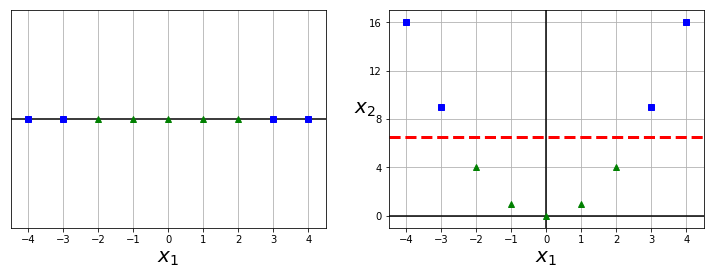

In [49]:
plt.figure(figsize = (11, 4))
 
plt.subplot(121)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color='k')
plt.plot(X1D[:, 0][y == 0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y == 1], np.zeros(5), 'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r'$x_1$', fontsize = 20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], 'bs')
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], 'g^')
plt.xlabel(r'$x_1$', fontsize = 20)
plt.ylabel(r'$x_2$', fontsize = 20, rotation = 0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], 'r--', linewidth = 3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right = 1)
plt.title('Figure 5-5. Adding features to make a dataset linearly separable')       # not shown in the book

plt.show()

參考上圖中的左圖：它表示只有一個特徵 $x_1$ 的簡單數據集。可以看到，此數據集是線性不可分的。 但是，如果添加第二個特徵-**二次特徵**$x_2 =(x_1)^2$，**得到的 2D 數據集則完全可線性分離**。

要使用 Scikit-Learn 實現這想法，可以創建一個 pipeline：包含 PolynomialFeatures 變換器，接著一個 StandardScaler，然後是 LinearSVC。 

使用 moons 資料集來測試

In [50]:
from sklearn.datasets import make_moons

In [51]:
X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

In [52]:
X[:10]

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347],
       [-0.65891281,  0.857088  ],
       [ 0.22828266,  0.73453868],
       [ 1.39439184, -0.45063627],
       [ 0.87158283,  0.70852888],
       [ 0.88304472, -0.12658445]])

In [53]:
y[:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [54]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
    plt.axis(axes)
    plt.grid(True, which = 'both')
    plt.xlabel(r'$x_1$', fontsize = 20)
    plt.ylabel(r'$x_2$', fontsize = 20, rotation = 0)

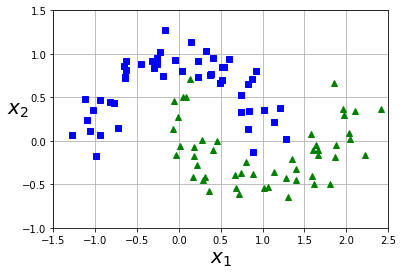

In [55]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [57]:
polynomial_svm_clf = Pipeline((('poly_features', PolynomialFeatures(degree = 3)),
                            ('scaler', StandardScaler()),
                            ('svm_clf', LinearSVC(C = 10, loss = 'hinge'))
                            ))

In [58]:
polynomial_svm_clf.fit(X, y)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [59]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1)

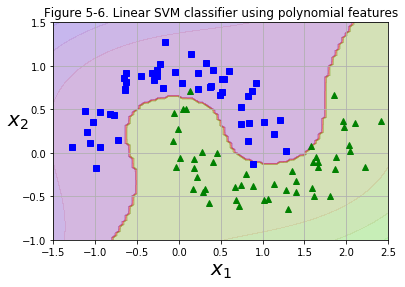

In [60]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('Figure 5-6. Linear SVM classifier using polynomial features')         # not shown in the book 

plt.show()

## Polynomial Kernel

添加多項式特徵很容易實現，並對所有的機器學習算法（不只是 SVM ）都非常有效，但是
* 多項式太低階時，會處理不了非常複雜的數據集
* 多項式太高階時，會產生大量的特徵，導致模型變得太慢

當使用 SVM 時，可以應用一種稱為**核技巧**的數學技術。**產生的結果跟添加許多多項式特徵，甚至是非常高階的多項式特徵一樣**，但實際上並不需要真的添加。由於實際上並沒有添加任何特徵，所以也就不存在數量爆炸的組合特徵。 

In [61]:
from sklearn.svm import SVC

In [62]:
poly_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
    ])

In [63]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

上面的程式是使用 3 次多項式的內核訓練 SVM 分類器。結果顯示在下圖的左側。 右邊是另一個使用 10 次多項式內內核的 SVM 分類器。

* 如果模型過擬合，應該降低多項式階數。
* 如果模型擬合不足，可以嘗試使之提升。

**超參數 coef0** 控制的是模型受高階多項式還是低階多項式的影響程度。

In [64]:
poly100_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel = 'poly', degree = 10, coef0 = 100, C = 5))
    ])

In [65]:
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

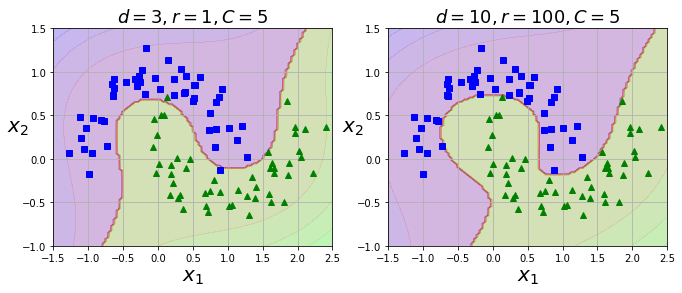

In [66]:
plt.figure(figsize = (11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d = 3, r = 1, C = 5$', fontsize = 18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d = 10, r = 100, C = 5$', fontsize = 18)

plt.show()

找到正確的超參數值的常用方法是使用**網格搜索**。先進行**非常粗略的網格搜索**，然後在最好的值附近展開一輪**更精細的網格搜索**，這樣通常會快一些。

**充分了解每個超參數實際上是用來做什麼的，有助在超參數空間層正確搜索。**

## Adding Similarity Features

解決非線性問題的另一種技術是**添加相似特徵**。這些函數經過*相似函數*計算得出，相似函數可以測量每個實例與一個特定地標（landmark）之間的相似度。

**Gaussian RBF：**

$$ \phi \gamma(x, l) = exp(- \gamma || x - l ||^2) $$

這是一個從 0（距地標很遠）到 1（跟地標一樣）變化的鐘型函數。

In [67]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis = 1) ** 2)

In [68]:
gamma = 0.3

In [69]:
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

In [70]:
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

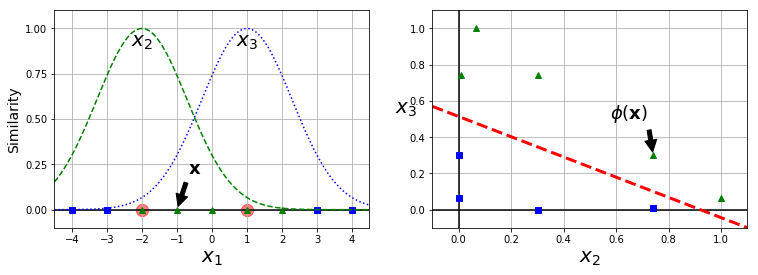

In [71]:
plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.scatter(x = [-2, 1], y = [0, 0], s = 150, alpha = 0.5, c = 'red')
plt.plot(X1D[:, 0][yk == 0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), 'g^')
plt.plot(x1s, x2s, 'g--')
plt.plot(x1s, x3s, 'b:')
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r'$x_1$', fontsize = 20)
plt.ylabel(r'Similarity', fontsize = 14)
plt.annotate(r'$\mathbf{x}$',
             xy = (X1D[3, 0], 0),
             xytext = (-0.5, 0.20),
             ha = 'center',
             arrowprops = dict(facecolor = 'black', shrink = 0.1),
             fontsize = 18, )
plt.text(-2, 0.9, '$x_2$', ha = 'center', fontsize = 20)
plt.text(1, 0.9, '$x_3$', ha = 'center', fontsize = 20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], 'bs')
plt.plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], 'g^')
plt.xlabel(r'$x_2$', fontsize = 20)
plt.ylabel(r'$x_3$', fontsize = 20, rotation = 0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy = (XK[3, 0], XK[3, 1]),
             xytext = (0.65, 0.50),
             ha = 'center',
             arrowprops = dict(facecolor = 'black', shrink = 0.1),
             fontsize = 18, )
plt.plot([-0.1, 1.1], [0.57, -0.1], 'r--', linewidth = 3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right = 1)

plt.show()

使用先前的一維數據集，並在 $x_1 = -2$ 和 $x_1 = 1$  處為其添加兩個地標（可參考上左圖）。用高斯徑向基函數（RBF）作爲相似函數， $γ= 0.3$（可參考先前公式）。

看實例 $x_1 = -1$：它與第一個地標的距離為 1，與第二個地標的距離為 2。因此，它的新特徵是 $x_2 = exp(-0.3×(-1 -(-2)) ^ 2)\approx 0.74$， $x_3 = exp(-0.3×2^2)\approx0.30$。

上圖的右側顯示了轉換後的數據集（删除了原始特徵）。現在呈現線性可分離的了。

要知道如何選擇地標，最簡單的方法是在數據集中每個實例的位置上創建一個地標。這樣創造出許多維度，因而也增加了轉換後的訓練集線性可分離的機會。
**缺點是一個有 $m$ 個實例 $n$ 個特徵的訓練集會被轉換成一個 $m$ 個實例 $m$ 個特徵的訓練集**（假設刪除了原始特徵）。如果訓練集非常大，那就會得到同樣大數量的特徵。

## Gaussian RBF Kernel

就像多項式特徵方法一樣，**相似特徵方法可用於任何機器學習算法**，但要計算所有附加特徵，其計算成本很高，特别是在大型訓練集上。然而，**核技巧**可以產生的結果就跟添加了許多相似性特徵一樣，而實際上不必添加。 

使用 SVC 試試**高斯 RBF 內核**

In [72]:
x1_example = X1D[3, 0]

In [73]:
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    
    print('Phi({}, {}) = {}'.format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [74]:
rbf_kernel_svm_clf = Pipeline(( 
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
))

In [75]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

該模型結果顯示在下圖的左下角。其他圖形顯示了使用不同的超參數值 **gamma 和 C**  訓練的模型。
* 增加 gamma 會使鐘形曲線變窄（見上圖的左圖），因此每個實例的影響範圍隨之變小：決策邊界變得更不規則，開始圍著單個實例繞彎。
* 減少 gamma 會使鐘形曲線變寬，因此每個實例的影響範圍增大，決策邊界變得更平坦。

所以 **$\gamma$ 就像一个正則化超參數** ：
* 如果模型過擬合，就降低它的值
* 如果模型欠擬合，就提升它的值（類似超參數 C）。

In [76]:
from sklearn.svm import SVC

In [77]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

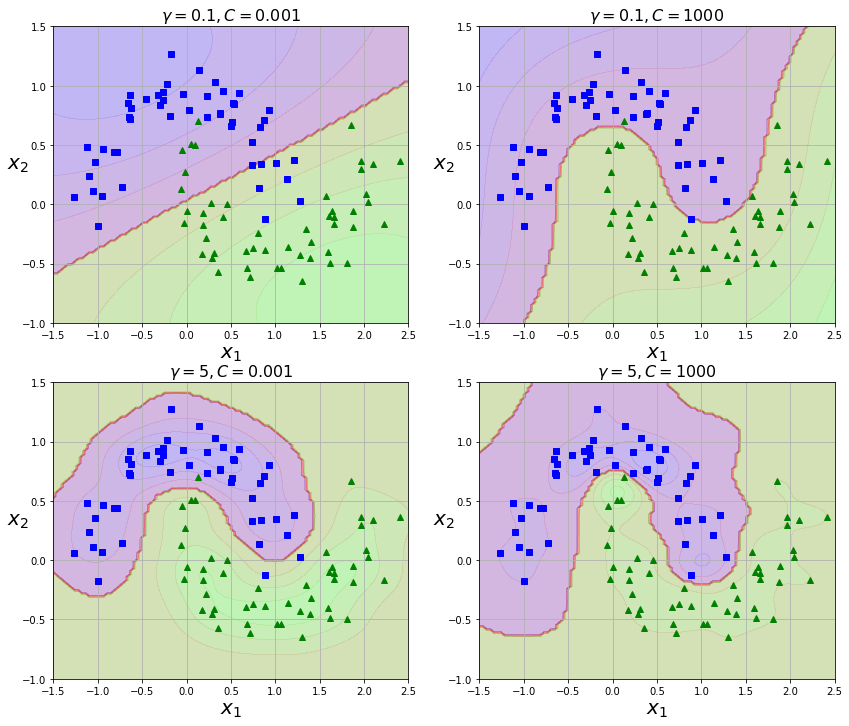

In [78]:
svm_clfs = []

for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ('scaler', StandardScaler()),
            ('svm_clf', SVC(kernel = 'rbf', gamma = gamma, C = C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize = (14, 12))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r'$\gamma = {}, C = {}$'.format(gamma, C), fontsize = 16)

plt.show()

還有一些其他較少用到的核函數。例如，專門針對特定數據結構的核函數。

**字符串內核**常用於文本文檔或是 DNA 序列（例如，使用**字符串子序列核函數**或**基於 Levenshtein 距離的核函數**）的分類。

這麼多核函數可以使用，但要決定使用哪一個，根據經驗法則，
* 永遠先從**線性核函數**開始嘗試（**LinearSVC 比 SVC(kernel = 'linear') 要快得多**），特别是如果**訓練集非常大**或者**特徵非常多**的時候。如果訓練集不是太大，可以試試**高斯 RBF 核**，在大多數情况下效果很好。
* 如果有多餘時間和計算能力，可以使用**交叉驗證和網格搜索**來嘗試其他一些核函數，**特别是那些專門針對特定數據集數據結構的核函數**。

## Computational Complexity

**LinearSVC** 是基於 liblinear的，而*liblinear* 為線性 SVM 實現一個優化算法。
- 它不支持內核技巧，但它與訓練實例的數量和特徵數量呈現線性相關：其訓練時間複雜度大致為 $O(m×n)$。

- 如果需要非常高的精度，算法需要更長的時間。這由容差（tolerance）超參數 $\varepsilon$（在Scikit-Learn 中稱為**tol**）來控制。在大多數分類任務中，預設的容差（tolerance）表現就很好。

**SVC** 則基於 libsvm，該算法支持內核技巧。
- 訓練時間複雜度通常在$ O(m_2×n)$ 和 $O(m_3×n)$ 之間。這意味著當訓練實例的數量變大（例如，上十萬個實例），將會變得非常非常慢。

- 該算法適用於**複雜但中小型的訓練集**。但還是可以良好地適應特徵數量的增加，特别是對應**稀疏特徵**（即，每個實例僅有少量的非零特徵）。在這種情况下，算法複雜度大致與實例的平均非零特徵數成比例。

下表比較 Scikit-Learn 的 SVM 分類器類別：

Class  | Time complexity  |  Out-of-core support | Scaling required | Kernel trick
------------- | ------------- | ------------- | ------------- | ------------- 
LinearSVC  | $O(m×n)$  | No | Yes | No
SGDClassifier | $O(m×n)$  | Yes | Yes | No 
SVC | $O(m_2×n)$ to $O(m_3×n)$  | No | Yes | Yes 

# SVM Regression

SVM 算法非常通用：**不僅支持線性和非線性分類，還支持線性和非線性迴歸**。 

訣竅在於將目標反轉一下：不再是嘗試擬合兩個類別之間可能的最寬的間隔的同時限制間隔違例，SVM 迴歸要做的是讓盡可能多的實例位於間隔上，同時限制間隔違例（也就是不在間隔上的實例）。間格的寬度由超參數 $\varepsilon$控制。

In [79]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [80]:
from sklearn.svm import LinearSVR

In [83]:
svm_reg1 = LinearSVR(epsilon = 1.5, random_state = 42)
svm_reg2 = LinearSVR(epsilon = 0.5, random_state = 42)

In [84]:
svm_reg1.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [85]:
svm_reg2.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [86]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    
    return np.argwhere(off_margin)

In [87]:
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg1.support_

array([[ 7],
       [14],
       [25],
       [31],
       [33],
       [34],
       [39],
       [42]])

In [88]:
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)
svm_reg2.support_

array([[ 0],
       [ 4],
       [ 5],
       [ 7],
       [ 9],
       [12],
       [13],
       [14],
       [15],
       [16],
       [19],
       [22],
       [23],
       [24],
       [25],
       [27],
       [29],
       [31],
       [33],
       [34],
       [35],
       [39],
       [42],
       [43],
       [44],
       [46],
       [49]])

In [89]:
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
eps_y_pred

array([6.52640746])

In [90]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', linewidth=2, label= r'$\hat{y}$')
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s = 180, facecolors = '#FFAAAA')
    plt.plot(X, y, 'bo')
    plt.xlabel(r'$x_1$', fontsize = 18)
    plt.legend(loc = 'upper left', fontsize = 18)
    plt.axis(axes)

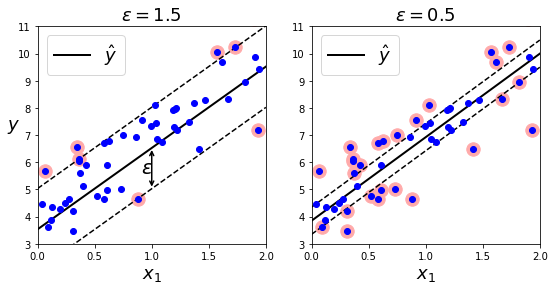

In [91]:
plt.figure(figsize = (9, 4))

plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg1.epsilon), fontsize = 18)
plt.ylabel(r'$y$', fontsize = 18, rotation = 0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy = (eps_x1, eps_y_pred), xycoords = 'data',
        xytext = (eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords = 'data', arrowprops = {'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r'$\epsilon$', fontsize = 20)

plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg2.epsilon), fontsize = 18)

plt.show()

上圖顯示了用隨機線性數據訓練的兩個線性 SVM 迴歸模型，一個間隔較大 $（\varepsilon = 1.5）$，另一個間隔較小$（\varepsilon= 0.5）$。

在間隔内添加更多實例不會影響模型的預測；所以這個模型被稱為是 **$\epsilon$-不敏感( $\epsilon$-insensitive)**。

使用 Scikit-Learn 的 LinearSVR 來執行**線性 SVM 迴歸**。

下面程式可生成上圖左側所示的模型（訓練數據需要先縮放並集中）

In [ ]:
#from sklearn.svm import LinearSVR
#svm_reg = LinearSVR(epsilon = 1.5, random_state = 42)
#svm_reg.fit(X, y)

要解決**非線性迴歸任務**，可以使用**內核 SVM 模型**。例如，下圖顯示了一個隨機二次訓練集上，使用二階多項式核的 SVM 迴歸。在左圖幾乎沒有正則化（C 值很大），在右圖上則過度正則化（C 值很小）。

In [92]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X ** 2 + np.random.randn(m, 1) / 10).ravel()

In [96]:
from sklearn.svm import SVR

In [97]:
svm_poly_reg1 = SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 0.1)

In [98]:
svm_poly_reg2 = SVR(kernel = 'poly', degree = 2, C = 0.01, epsilon = 0.1)

In [99]:
svm_poly_reg1.fit(X, y)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
svm_poly_reg2.fit(X, y)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

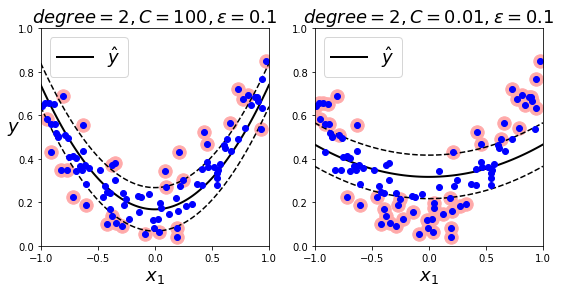

In [101]:
plt.figure(figsize = (9, 4))

plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r'$degree={}, C={}, \epsilon = {}$'.format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize = 18)
plt.ylabel(r'$y$', fontsize = 18, rotation = 0)

plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r'$degree={}, C={}, \epsilon = {}$'.format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize = 18)

plt.show()

以下程式使用 **Scikit-Learn 的 SVR**（支持內核技巧）可生成上圖左側所示的模型。 
* SVR 是 SVC 的迴歸等價物
* LinearSVR 也是 LinearSVC 的迴歸等價物。 

In [ ]:
#from sklearn.svm import SVR
#svm_poly_reg =SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 0.1)
#svm_poly_reg.fit(X, y)

LinearSVR 與訓練集的大小成線性相關（跟 LinearSVC 一樣），而 SVR 則在訓練集變大時，變得很慢（SVC 也是一樣）。

SVM 也可用於**異常值檢測**，可以參考 Scikit-Learn 文件。

# Under the Hood

**概述**

支持向量機致力於在正負樣本的邊界上找到一條**分割界線（超平面）**，使得它能完全區分兩類樣本的同時保證劃分出的間隔盡量的大。

如果一條分割界線無法完全區分（線性不可分），
- 要麼加上**鬆弛變量**進行適當的容忍，
- 要麼透過**核函數**對樣本進行空間上的映射後再進行劃分。

## Decision Function and Predictions

線性 SVM 分類器模型透過簡單計算**決策函數** $ w^T\cdot x + b = w_1 x_1 + ... + w_n x_n + b$ 來預測新實例 $x$ 的分類：如果結果為正，則預測類別 $\hat y$ 為正類(1)，否則是負類(0)。

$b$ 為偏置項  
$w$ 為特徵權重向量

**Linear SVM classifier prediction：**

$$ \hat y = \begin{cases} 0 & if \; w^T \cdot x + b < 0, \cr 1 & if \; w^T \cdot x + b \geqslant 0 \end{cases} $$

In [102]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

In [103]:
from mpl_toolkits.mplot3d import Axes3D

In [104]:
def plot_3D_decision_function(ax, w, b, x1_lim = [4, 6], x2_lim = [0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s * (w[0] / w[1]) - b / w[1]
    margin_x2s_1 = -x1s * (w[0] / w[1]) - (b - 1) / w[1]
    margin_x2s_2 = -x1s * (w[0] / w[1]) - (b + 1) / w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1), color = 'b', alpha = 0.2, cstride = 100, rstride = 100)
    ax.plot(x1s, boundary_x2s, 0, 'k-', linewidth = 2, label = r'$h=0$')
    ax.plot(x1s, margin_x2s_1, 0, 'k--', linewidth= 2, label = r'$h=\pm 1$')
    ax.plot(x1s, margin_x2s_2, 0, 'k--', linewidth=2)
    ax.plot(X_crop[:, 0][y_crop == 1], X_crop[:, 1][y_crop == 1], 0, 'g^')
    ax.plot_wireframe(x1, x2, df, alpha = 0.3, color = 'k')
    ax.plot(X_crop[:, 0][y_crop == 0], X_crop[:, 1][y_crop == 0], 0, 'bs')
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize = 15)
    ax.set_xlabel(r'Petal length', fontsize = 15)
    ax.set_ylabel(r'Petal width', fontsize = 15)
    ax.set_zlabel(r'$h = \mathbf{w}^T \mathbf{x} + b$', fontsize = 18)
    ax.legend(loc = 'upper left', fontsize = 16)

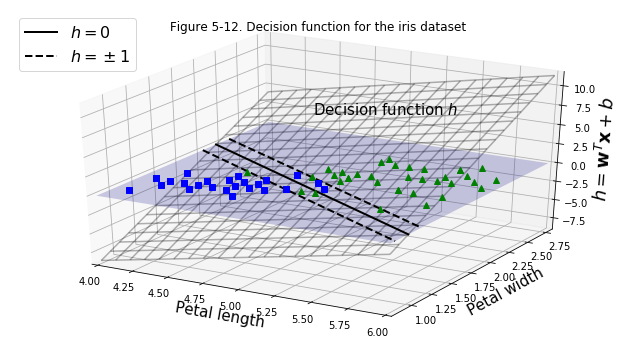

In [105]:
fig = plt.figure(figsize = (11, 6))
ax1 = fig.add_subplot(111, projection = '3d')
plot_3D_decision_function(ax1, w = svm_clf2.coef_[0], b = svm_clf2.intercept_[0])
plt.title('Figure 5-12. Decision function for the iris dataset')

plt.show()

上圖顯示的數據集中包含兩個特徵（花瓣寬度和長度），所以是一個二維平面，決策邊界是決策函數等於 0 的點之集合，是兩個平面的交集，也就是一條直線（加粗實線所示）。

*當有 n 個特徵時，決策函數是一個 n 維的超平面，決策邊界是一個 (n-1) 維的超平面。*

虛線表示決策函數等於 1 或 -1 的點，互相平行，並且與決策邊界的距離相等，而形成了一個間隔。

訓練線性 SVM 分類器意味著找到 $w$ 和 $b$ 的值，從而使這個間隔盡可能寬的同時避免（硬間隔）或是限制（軟間隔）間隔違例。

## Training Objective

**決策函數的斜率**是等於權重向量的範數，$∥w∥$。 **如果將該斜率除以 2，則決策函數等於 ±1 的點也將變得離決策邊界兩倍遠**。 將斜率除以 2 將會使間隔乘以2。


下圖顯示，**權重向量 $w$ 越小，間隔越大**。

In [106]:
def plot_2D_decision_function(w, b, ylabel = True, x1_lim = [-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], 'k:')
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y = 0, color = 'k')
    plt.axvline(x  =0, color = 'k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], 'k-o', linewidth = 3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r'$x_1$', fontsize = 16)
    
    if ylabel:
        plt.ylabel(r'$w_1 x_1$', rotation = 0, fontsize = 16)
        
    plt.title(r'$w_1 = {}$'.format(w), fontsize = 16)

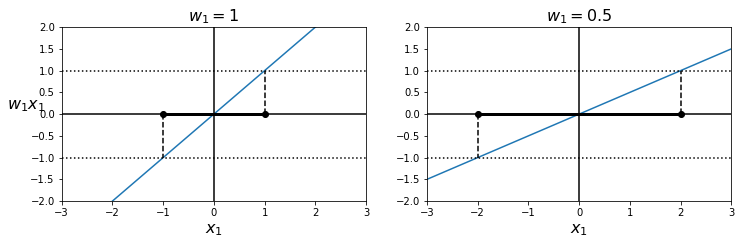

In [107]:
plt.figure(figsize = (12, 3.2))

plt.subplot(121)
plot_2D_decision_function(1, 0)

plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel = False)

plt.show()

因此，**要最小化$∥w∥$來得到盡可能大的間隔**。但是，如果想避免任何間隔違例（硬間隔），那
* 要使所有正類訓練集的決策函數**大於 1**
* 要使所有負類訓練及的決策函數**小於 -1**

如果定義實例為負類（如果 $y^{(i)}=0$）時，$t^{(i)}=-1$，實例為正類（如果 $y^{(i)}=1$）時，$t^{(i)}=1$，那就可以將這個約束條條件表示為：對所有實例來說，$t^{(i)}(w^T\cdot x^{(i)}+b) \geqslant 1$。

因此，可以將**硬間隔線性 SVM 分類器的目標**看成一個*約束優化*問題，如以下公式所示。

**Hard margin linear SVM classifier objective：**

$$ \underset{\textrm{w}, b}{minimize} \; \frac{1}{2} \textrm{w}^T \cdot \textrm{w} $$

$$ subject \; to \; t^{(i)}(\textrm{w}^T \cdot \textrm{x}^{(i)} + b) \geqslant 1(i = 1, 2, ..., m) $$ 

最小化的是 $\frac{1}{2} \textrm{w}^T \cdot \textrm{w}$，這等於 $\frac{1}{2} ||\textrm{w}||^2 $，但不是最小化$||\textrm{w}||$。二者雖然會得到相同的結果（讓某個值最小的 $\textrm{w}$ 和 $b$，同樣也使其平方的一半最小），但 $\frac{1}{2}||\textrm{w}||^2$ 有一個簡單好用的導數（就是$\textrm{w}$），而 $||\textrm{w}||$ 在 $ \textrm{w} = 0$ 時，是不可微的。優化算法在可微函數上的工作效果要好得多。

要達到軟間隔的目標，需要為每個實例引入一個*鬆弛變量（slack variable)* $\zeta^{(i)} \geqslant 0$，$\zeta^{(i)}$衡量的是第 i 個實例多大程度上允許間隔違例。

現有了兩個互相衝突的目標：使鬆弛變量越小越好從而減少間隔違例，同時還要使 $\frac{1}{2} \textrm{w}^T \cdot \textrm{w} $最小化以增大間隔。這可以利用超參數 $C$ 在兩個目標間權衡。

以下公式顯示這個約束優化問題。

**Soft margin linear SVM classifier objective：**

$$ \underset{\textrm{w}, b, \zeta}{minimize} \; \frac{1}{2}\textrm{w}^T \cdot \textrm{w} + C\sum_{i = 1}^m \zeta^{(i) }$$

$$ subject \; to \; t^{(i)}(\textrm{w}^T \cdot \textrm{x}^{(i)} + b) \geqslant 1-\zeta^{(i)} \; and \; \zeta^{(i)} \geqslant 0 \; (i = 1, 2, ..., m) $$ 

## Quadratic Programming

硬間隔和軟間隔的問題都是線性約束的凸二次優化問題。這些問題稱為**二次規劃（QP）問題**。目前已有很多現成的求解器可以解決二次規劃問題。下列公式為問題的一般形式。

**Quadratic Programming problem：**

$$ \underset{p}{minimize} \; \frac{1}{2} \textrm{p}^T \cdot \textrm{H} \cdot \textrm{p} + \textrm{f}^t \cdot \textrm{p} $$

$$ subject \; to \; \textrm{A} \cdot \textrm{p} \leqslant \textrm{b} $$

$$ where \begin{cases} \textrm{p} \; 是一個 n_p 維向量（n_p 為參數數量） \cr \textrm{H} \; 是一個 n_p*n_p 矩陣 \cr \textrm{f} \; 是一個 n_p 維向量 \cr \textrm{A} \; 是一個 n_c * n_p 矩陣（n_c為約束數量） \cr \textrm{b}\; 是一個 n_c 維向量 \end{cases} $$


注意，表達式 $\textrm{A}\cdot \textrm{p} \leqslant \textrm{b}$ 實際上定義了 $n_c$ 個約束：對於 $i = 1,2，⋯，n_c$， $\textrm{p}^T \cdot \textrm{a}^{(i)} \leqslant b^{(i)}$，其中 $\textrm{a}^{(i)}$ 是包含 $\textrm{A}$ 的第 $i$ 列元素的向量, $b^(i)$ 是 $\textrm{b}$ 的第 $i$ 個元素。

可以驗證，如果把二次規劃參數以下列方式設置，是否可以實現硬間隔線性 SVM 分類器的目標：
* $n_p = n+1$, 其中 n 是特徵數量（**+1** 是偏差項）
* $n_c = m$，m 是訓練實例的數量
* $\textrm{H}$ 是$n_p×n_p$是單位矩陣，除了在左上角的一項為零（忽略偏差項）
* $\textrm{f} = 0$ ,一個 $n_p$ 維的向量，元素都為0
* $\textrm{b} = 1$ ,一個 $n_c$ 維的向量，元素都為1
* $ \textrm{a}^{(i)} = -t^{(i)}  \dot{\textrm{x}}^{(i)}$，其中 $\dot{\textrm{x}}^{(i)}$ 等於 $\textrm{x}^{(i)}$ ，除了一個額外的偏置特徵 $\dot{\textrm{x}}_0 = 1$

因此，要訓練硬間隔線性 SVM 分類器，有種方法勢將上面的參數用在一個現成的二次規劃求解器上。得到的向量 $\textrm{p}$ 會包含偏置項 $b = p_0$，以及特徵權重 $w_i = p_i，i = 1, 2, ... ,m $。類似地，也可以使用 QP 求解器來解決軟間隔問題。

## The Dual Problem

給定一個約束優化問題，稱為**原始問題（primal problem）**，常可以用另一個不同的，但是與之密切相關的問題來表達，這個問題稱其為**對偶問題（dual problem）**。對偶問題的解只能算是原始問題的解的下限，但在某些情況下，它可以跟**原始問題的解完全相同**。

SVM 問題剛好滿足這些條件（目標函數式凸函數，並且不等式約束是連續可微的凸函數），因此可以選擇解決原始問題或對偶問題；兩者解都相同。 

以下公式顯示了**線性 SVM 目標的對偶形式**。

**Dual form of the linear SVM objective：**

$$ \underset{\alpha}{minimize} \; \frac{1}{2} \sum_{i =1}^m \sum_{j=1}^m \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} x^{(i)T}\cdot x^{(j)} -  \sum_{i = 1}^m \alpha^{(i)} $$

$$ subject \; to \; \alpha^{(i)} \geqslant 0 \; (i = 1, 2, ..., m) $$



一旦找到使得該等式最小化（用二次規劃求解器）的向量 $\hat \alpha$，就可以用以下公式來計算使原始問題最小化的 $\hat w$ 和 $\hat b$。

**From the dual solution to the primal solution：**

$$ \hat w = \sum_{i=1}^m \alpha^{(i)}t^{(i)}x^{(i)} $$

$$ \hat b = \frac{1}{n_s} \sum_{\underset{\hat \alpha^{(i)} >0}{i =1}}^m (1-t^{(i)}(\hat w^T \cdot x^{(i)})) $$



**當訓練實例的數量小於特徵的數量時，對偶問題比原始問題解決得更快。更重要的是，它使核技巧成為可能，而原始問題不可以。**

## Kernelized SVM

要將一個二階多項式轉換為一個二維訓練集，然後在轉換訓練集上訓練線性 SVM 分類器。這個二階多項式的映射函數 $\phi$ 如下公式所示。

**Second-degree polynomial mapping：**

$$ \phi(x) = \phi \left( \left (\begin{matrix}x_1 \cr x_2\end{matrix}\right )\right)= \left\lgroup\begin{matrix}x_1^2 \cr \sqrt{2}x_1x_2  \cr x_2^2 \end{matrix}\right\rgroup $$

這個轉換後的向量是一個三維的向量。

使用這個二階多項式映射，將兩個二維向量 $a$ 和 $b$ 進行轉換，並計算轉換後兩個向量的點積，如下公式。

**Kernel trick for a 2nd-degree polynomial mapping：**

$$ \phi(a)^T \cdot \phi(b) = \left\lgroup\begin{matrix}a_1^2 \cr \sqrt{2}a_1a_2  \cr a_2^2 \end{matrix}\right\rgroup^T \cdot \left\lgroup\begin{matrix}b_1^2 \cr \sqrt{2}b_1b_2  \cr b_2^2 \end{matrix}\right\rgroup $$

$$  \qquad = a_1^2b_1^2 + 2a_1b_1a_2b_2 + a_2^2b_2^2 $$

$$  = (a_1b_1 + a_2b_2)^2 $$

$$ \qquad =\left( \left (\begin{matrix}a_1 \cr a_2\end{matrix}\right )\right)^T \cdot  \left( \left (\begin{matrix}b_1 \cr b_2\end{matrix}\right )\right)^2 $$

$$ = ( \textrm{a}^T \cdot  \textrm{b})^2 $$



 
轉換後向量的點積等於原始向量的點積的平方：$\phi(a)^T \cdot \phi(b) = (a^T \cdot b)^2 $

如果要將轉換映射 $\phi$ 應用於所有訓練實例，則對偶問題（**Dual form of the linear SVM objective**公式）將包含點積 $\phi(x^{(i)})^T \cdot \phi(x^{(i)})$ 的計算。如果 $\phi$ 是**Second-degree polynomial mapping**公式所定義的二基多項式轉換，那可以直接用 $x^{(i)^T} \cdot x^{(j)})^2$ 來代替這個轉換向量的點積。所以不需要轉換訓練實例，只需將**Dual form of the linear SVM objective**公式裡的點積轉換成點積的平方。

可以動手將訓練集進行形轉換，然後擬合線性 SVM 算法，其結果一模一樣。但這技巧提高了整個過程的計算效率，這就是核技巧的本質。

函數 $K(a,b)=(a^T \cdot b)^2$ 被稱為*二階多項式核（2nd-degree polynomial kernel）*。在機器學習中，*核（kernel）*是能夠僅基於原始向量 $\textrm{a}$ 和 $\textrm{b}$ 來計算點積 $\phi(a)^T \cdot \phi(b)$ 的函數，不需要計算轉換函數 $\phi$。

以下列出常用的核函數。

**Common kernels：**

$ \qquad Linear： \quad \quad \qquad K(\textrm{a}, \textrm{b}) = \textrm{a}^T \cdot \textrm{b} $

$ \qquad Polynomial：\quad \quad K(\textrm{a}, \textrm{b}) = ( \gamma \textrm{a}^T \cdot \textrm{b}+r)^d $

$ \qquad Gaussian RBF：\quad K(\textrm{a}, \textrm{b}) = exp(- \gamma ||\textrm{a} - \textrm{b}||^2) $

$ \qquad Sigmoid：\qquad \quad K(\textrm{a}, \textrm{b}) = tanh(\gamma \textrm{a}^T\cdot \textrm{b}+r)$

**Mercer’s Theorem**

根據 Mercer 定理，如果函數 $K(\textrm{a}, \textrm{b})$ 符合幾個數學條件，也就是 *Mercer 條件*（$K$ 必須是連續的，並且在其參數上對稱，所以 $K(\textrm{a}, \textrm{b}) = K(\textrm{b}, \textrm{a})$, 等等），則存在函數 $\phi$ 將 $\textrm{a}$ 和 $\textrm{b}$ 映射到另一個空間（可能是更高維度的空間），使得 $K(\textrm{a}, \textrm{b})= \phi (\textrm{a})^T\cdot \phi (\textrm{b}) $。所以可以將 $K$ 用作核函數，因為 $\phi$ 是存在的，即使是不知道它是什麼樣子。對於高斯 RBF 核函數，可以看出 $\phi$ 實際上是將每個訓練實例映射到一個無限維空間，幸好不用執行這個映射。

有一些常用的核函數（如 Sigmoid 核函數）不符合 Mercer 條件的所有條件，但在實際應用中也表現不錯。

在公式**From the dual solution to the primal solution**顯示了用**線性 SVM 分類器**如何從對偶解走到原始解，但如果應用核技巧，最終會得到包含 $\phi(x^{(i)})$ 的方程式。而 $\hat w$ 的維度數量必須與 $\phi(x^{(i)})$ 相同，但後者可能是巨大的甚至是無限大的，所以根本無法计算。 

在不知道 $\hat w$ 的情况要做出預測，可以將公式**From the dual solution to the primal solution**中的 $\hat w$ 的公式插入到新實例 $x^{(n)}$ 的決策函數中，就可以到一個只有包含輸入向量之間點積的公式。這時就可以再次使用核技巧（可參考以下公式）

**Making predictions with a kernelized SVM：**

$$ h_{}(\phi(\textrm{X}^{(n)})) = \hat{\textrm{W}}^T \cdot \phi(\textrm{X}^{(n)}) + \hat b = \left(\sum_{i=1}^m \hat{\alpha}^{(i)}t^{(i)}\phi(\textrm{X}^{(i)})\right)^T \cdot \phi (\textrm{X}^{(n)})+\hat b $$

$$ = \sum_{i = 1}^m \hat{\alpha}^{(i)} t^{(i)} (\phi(\textrm{X}^{(i)})^T \cdot \phi (\textrm{X}^{(n)})) + \hat b $$

$$ = \sum_{\underset{\hat \alpha^{(i)} >0}{i =1}}^m \hat{\alpha}^{(i)} t^{(i)} K(\textrm{X}^{(i)}, \textrm{X}^{n}) + \hat b $$

注意，因為僅對於支持向量才有 $\alpha^(i) \ne 0$，所以預測時，計算新輸入向量 $x^{(n)}$ 的點積，使用的僅是支持向量而不是所有訓練實例。 還需要使用相同的技巧計算偏置項 $\hat b$（可參考以下公式）。

**Computing the bias term using the kernel trick：**

$$ \hat b = \frac{1}{n_s} \sum_{\underset{\hat \alpha^{(i)} >0}{i =1}}^m (1 - t^{(i)}\hat{\textrm{W}}^T \cdot \phi(\textrm{X}^{(i)})) $$

$$ \qquad \qquad \qquad\quad= \frac{1}{n_s} \sum_{\underset{\hat \alpha^{(i)} >0}{i =1}}^m \left(1 - t^{(i)}\left(\sum_{j=1}^m \hat{\alpha}^{j}t^{(j)}\phi(\textrm{X}^{(j)})\right) ^T \cdot \phi(\textrm{X}^{(i)})\right) $$


$$ \qquad \qquad = \frac{1}{n_s} \sum_{\underset{\hat \alpha^{(i)} >0}{i =1}}^m (1 - t^{(i)}\sum_{\underset{\hat \alpha^{(i)} >0}{i =1}}^m \hat{\alpha}^{j}t^{(j)}K(\textrm{x}^{(i)}, \textrm{x}^{(j)})) $$

## Online SVMs

在線學習（online learning）意味著增量學習（learning incrementally），通常是新實例到來的時候學習。

在線 SVM 分類器中，對線性 SVM 分類器來說，方法之一是使用梯度下降，使從原始問題導出的成本函數最小化（可參考以下公式）。但這種方法的收斂速度比二次規劃方法要慢得許多。

**Linear SVM classifier cost function：**

$$ J(\textrm{}, b) = \frac{1}{2} \textrm{w}^T \cdot \textrm{w} + C \sum_{i=1}^m max(0, 1 - t^{(i)}(\textrm{w}^T \cdot \textrm{x}^{(i)} + b)) $$

成本函數中的第一項會推動模型得到一個較小的權重向量 $\textrm{w}$，使得間隔更大。第二項則計算全部的間隔違例。如果沒有一個示例位於間隔之上，且都在間隔正確的一邊，則這個實例的間隔違例為 0，不然，則該實例的違例大小與其到間隔正確一邊的距離成正比。所以將這個項最小化，能保證模型使間隔違例盡可能小及少。

**Hingo 損失函數**

函數 $max(0, 1-t）$ 被稱為 $hinge$ 損失函數（如下圖所示）。當 $t \geqslant 1$ 時，函數等於 0。如果 $t<1$ 時，其導數（斜率）等於 -1。如果 $t>1$ ，則導數（斜率）為 0。 $t = 1$ 時，函數不可導。但在 $t = 0$ 處可以使用任意次導數（即 -1 到 0 之間的任意值），還是可以使用梯度下降，就跟 Lasso 迴歸一樣。

In [108]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)     # max(0, 1-t)

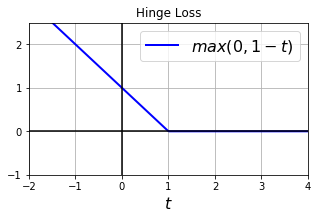

In [109]:
plt.figure(figsize = (5, 2.8))
plt.plot(t, h, 'b-', linewidth = 2, label = '$max(0, 1 - t)$')
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel('$t$', fontsize = 16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc = 'upper right', fontsize = 16)
plt.title('Hinge Loss')

plt.show()

# Extra material

## Training time

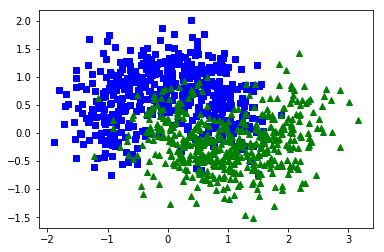

In [111]:
X, y = make_moons(n_samples = 1000, noise = 0.4, random_state = 42)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')

In [112]:
import time

[LibSVM]0 0.1 0.31893301010131836
[LibSVM]1 0.01 0.29421210289001465
[LibSVM]2 0.001 0.35137200355529785
[LibSVM]3 0.0001 0.6082661151885986
[LibSVM]4 1e-05 1.118346929550171
[LibSVM]5 1.0000000000000002e-06 1.005445957183838
[LibSVM]6 1.0000000000000002e-07 1.251465082168579
[LibSVM]7 1.0000000000000002e-08 1.3465428352355957
[LibSVM]8 1.0000000000000003e-09 1.3212120532989502
[LibSVM]9 1.0000000000000003e-10 1.2511637210845947


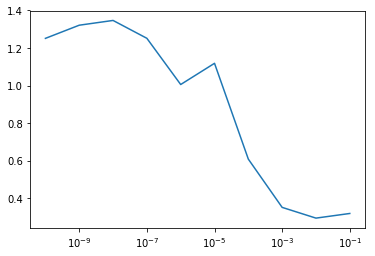

In [113]:
tol = 0.1
tols = []
times = []

for i in range(10):
    svm_clf = SVC(kernel = 'poly', gamma = 3, C = 10, tol = tol, verbose = 1)
    t1 = time.time()
    svm_clf.fit(X, y)
    
    t2 = time.time()
    times.append(t2 - t1)
    tols.append(tol)
    
    print(i, tol, t2 - t1)
    tol /= 10

plt.semilogx(tols, times)

## Linear SVM classifier implementation using Batch Gradient Descent

In [114]:
# Training set
X = iris['data'][:, (2, 3)]               # petal length, petal width
y = (iris['target'] == 2).astype(np.float64).reshape(-1, 1)          # Iris-Virginica

In [115]:
from sklearn.base import BaseEstimator

In [116]:
class MyLinearSVC(BaseEstimator):
    def __init__(self, C = 1, eta0 = 1, eta_d = 10000, n_epochs = 1000, random_state = None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)         # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1      # -1 if t==0, +1 if t==1
        X_t = X * t
        self.Js = []

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1 / 2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

In [117]:
C = 2

In [118]:
svm_clf = MyLinearSVC(C = C, eta0 = 10, eta_d = 1000, n_epochs = 60000, random_state = 2)

In [119]:
svm_clf.fit(X, y)

MyLinearSVC(C=2, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)

In [120]:
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

[0, 60000, 0, 100]

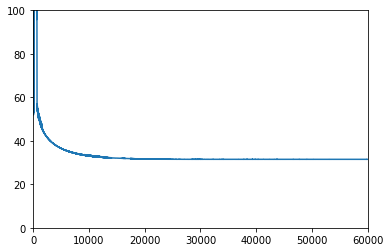

In [121]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

In [122]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [123]:
svm_clf2 = SVC(kernel = 'linear', C = C)

In [124]:
svm_clf2.fit(X, y.ravel())

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [125]:
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


[4, 6, 0.8, 2.8]

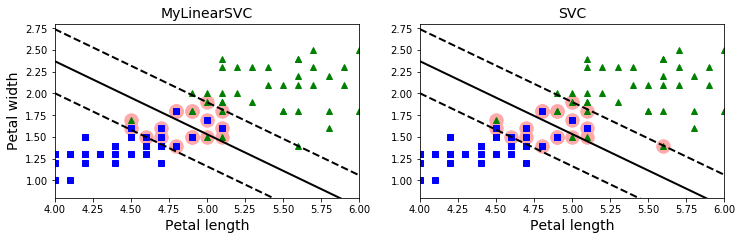

In [126]:
yr = y.ravel()
plt.figure(figsize = (12, 3.2))
plt.subplot(121)
plt.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], 'g^', label = 'Iris-Virginica')
plt.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], 'bs', label = 'Not Iris-Virginica')
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.title('MyLinearSVC', fontsize = 14)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], 'g^')
plt.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], 'bs')
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel('Petal length', fontsize = 14)
plt.title('SVC', fontsize = 14)
plt.axis([4, 6, 0.8, 2.8])

In [127]:
from sklearn.linear_model import SGDClassifier

In [128]:
sgd_clf = SGDClassifier(loss = 'hinge', alpha = 0.017, max_iter = 50, random_state = 42)

In [129]:
sgd_clf.fit(X, y.ravel())

SGDClassifier(alpha=0.017, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
m = len(X)
t = y * 2 - 1       # -1 if t==0, +1 if t==1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0=1
X_b_t = X_b * t

In [131]:
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)

[-14.06195929   2.24179316   1.79750198]


In [132]:
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()

In [133]:
sgd_clf.support_vectors_ = X[support_vectors_idx]

In [134]:
sgd_clf.C = C

[4, 6, 0.8, 2.8]

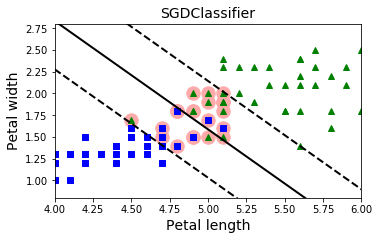

In [135]:
plt.figure(figsize = (5.5, 3.2))
plt.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], 'g^')
plt.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], 'bs')
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.title('SGDClassifier', fontsize = 14)
plt.axis([4, 6, 0.8, 2.8])

# 心得

這篇主要是在說明 SVM 的內容，公式是有些多的，前幾天重新再看一次，有新的體悟。作者從線性開始談起，之後談到核（kernel）的概念的內容，雖然整篇的數學比起之前多了一些，但還是可以很簡潔的了解內容。雖然在實際運用的例子上比起其他的書籍沒有很多的例子，但對於真正了解此演算法的精神與參數，可以更加體會。重要的事，還是要對超參數有明確的了解，這樣在實作上要調適時，可以比較會有方向。針對核的選擇，也可以參考作者的建議，先從線性的開始，在對資料集的大小可以選擇高斯，或是有足夠的時間，就用網格搜尋的方式找到最適合的核。